In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import json 
import sys
sys.path.append('../dataloaders/')
sys.path.append('../utils/')

from dataloader import DataLoader 
import plotting

In [43]:
! ls ../utils

find_compatible_hits_dev.py  geometry.py  noise.py     __pycache__
find_compatible_hits.py      hits.py	  plotting.py


In [30]:
#f = open("/home/lhv14/mapping_noMissing_noPtcut_1400.json")
#f = open("/home/lhv14/mapping_CMS_nocut_1000.json")
#f = open("/home/lhv14/mapping_cm_noMissing_noPtcut__noDoubles_1000.json") 
#f = open("/home/lhv14/testmap_del.json")
#f = open("/home/lhv14/seedmapping_cm_noMissing_noPtcut__noDoubles_200.json")
f = open("seedmapping_cm_noMissing_noPtcut_noDoubles_838.json")
mappings = json.load(f)

In [81]:
! ls  ~/seed*

/home/lhv14/seedmapping_cm_noMissing_noPtcut__noDoubles_1400.json
/home/lhv14/seedmapping_cm_noMissing_noPtcut__noDoubles_200.json
/home/lhv14/seedmapping_noMissing_noPtcut__noDoubles_1400.json

/home/lhv14/seeding:
'Inference Bias.ipynb'	'Intersection points.ipynb'


In [3]:
md = pd.read_csv('/home/lhv14/new_md_hitbased.csv',  header=[0], index_col=[0, 1,2])
md = md.reset_index()
md.rename(columns = {'level_1':'volume_id', 'level_2':'layer_id'}, inplace = True)

In [46]:
dl = DataLoader() 
hits, allowed_hits = dl.load_data_trackml(1000)
print("len1", len(hits))
smallest_rs = allowed_hits.groupby(['particle_id', 'unique_layer_id'])['r'].min()
allowed_hits = allowed_hits.merge(smallest_rs)
allowed_hits = allowed_hits.drop_duplicates(subset=['hit_id'])


print("len hits", len(hits))
hits_barrel = hits[hits['volume_id'].isin([8, 13, 17])]

hits_barrel['new_module_id'] = [str(int(row[0])) + str(int(row[1])) + str(int(round(row[2], 0))) for row in hits_barrel[['volume_id', 'unique_layer_id','z']].values] 

hits_endcaps = hits[~hits['volume_id'].isin([8, 13, 17])]
hits_endcaps['new_module_id'] = [str(int(row[0])) + str(int(row[1])) + str(int(round(row[2], 0))) for row in hits_endcaps[['volume_id', 'unique_layer_id','r']].values] 

hits = pd.concat([hits_barrel, hits_endcaps])


hits_barrel = allowed_hits[allowed_hits['volume_id'].isin([8, 13, 17])]

hits_barrel['new_module_id'] = [str(int(row[0])) + str(int(row[1])) + str(int(round(row[2], 0))) for row in hits_barrel[['volume_id', 'unique_layer_id','z']].values] 

hits_endcaps = allowed_hits[~allowed_hits['volume_id'].isin([8, 13, 17])]
hits_endcaps['new_module_id'] = [str(int(row[0])) + str(int(row[1])) + str(int(round(row[2], 0))) for row in hits_endcaps[['volume_id', 'unique_layer_id','r']].values] 

allowed_hits = pd.concat([hits_barrel, hits_endcaps])


../dataloaders/dataloader.py:154: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  self.hits[['next_mod_id', 'connecting_layer_id']] = self.hits.groupby('particle_id')['discrete_module_id', 'unique_layer_id'].shift(-1)


len1 64815
len hits 64815


/tmp/ipykernel_52025/2525609298.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hits_barrel['new_module_id'] = [str(int(row[0])) + str(int(row[1])) + str(int(round(row[2], 0))) for row in hits_barrel[['volume_id', 'unique_layer_id','z']].values]
/tmp/ipykernel_52025/2525609298.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hits_endcaps['new_module_id'] = [str(int(row[0])) + str(int(row[1])) + str(int(round(row[2], 0))) for row in hits_endcaps[['volume_id', 'unique_layer_id','r']].values]
/tmp/ipy

In [8]:
allowed_hits

,hit_id,x,y,z,r,layer_id,volume_id,module_id,phi,particle_id,...,nhits,q,discrete_module_id,Unnamed: 0,unique_layer_id,z_2,diff_z,next_mod_id,connecting_layer_id,new_module_id
154,17385,2.967890,1.037270,1.412500,3.143931,2,8,121,0.336227,5.899834e+17,...,8,-1,876,0,1.0,2.160420,0.747920,1221.0,2.0,811
155,17833,-2.092560,2.346380,3.043080,3.143932,2,8,126,2.299076,1.936634e+17,...,10,-1,881,0,1.0,8.051570,5.008490,1263.0,2.0,813
157,17968,-2.832590,1.364090,6.659020,3.143932,2,8,127,2.692798,1.396293e+17,...,10,1,882,0,1.0,15.082601,8.423580,1297.0,2.0,817
159,17701,0.175151,3.139050,0.513878,3.143933,2,8,124,1.515057,4.008248e+17,...,11,1,879,0,1.0,0.082810,-0.431068,1227.0,2.0,811
160,16868,-0.175875,-3.139010,4.442280,3.143933,2,8,116,-1.626767,3.828203e+17,...,12,-1,871,0,1.0,10.529799,6.087520,1243.0,2.0,814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46002,93984,81.073402,59.570801,295.549988,100.606041,12,18,60,0.633686,6.530288e+17,...,14,1,18689,61,48.0,295.250000,-0.299988,18688.0,48.0,1848101
46003,81120,88.009598,48.767700,-255.250000,100.617989,4,16,59,0.505999,6.260010e+17,...,12,1,11996,50,41.0,-255.550003,-0.300003,11994.0,41.0,1641101
46004,93830,-6.498870,-100.417000,295.250000,100.627075,12,18,23,-1.635425,7.475989e+17,...,14,-1,18652,61,48.0,295.549988,0.299988,18654.0,48.0,1848101
46084,92500,43.840797,91.702499,150.250000,101.643318,4,18,66,1.124841,4.998997e+17,...,12,1,18303,57,44.0,150.550003,0.300003,18305.0,44.0,1844102


In [9]:
def calc_distance(m, b, point_z, point_r): 
    d = np.abs(m*point_z - point_r +b )/np.sqrt(m**2+1)
    return d

In [10]:
def eval_line_at_point(m, b, z): 
    r = m * z +  b
    return r 

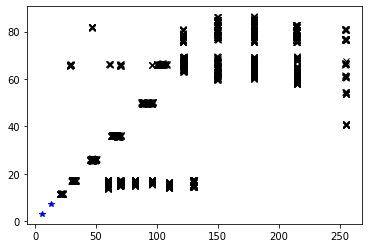

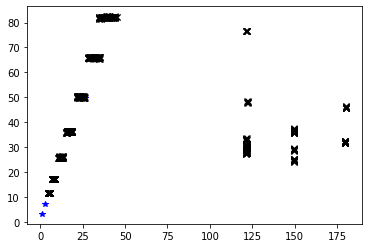

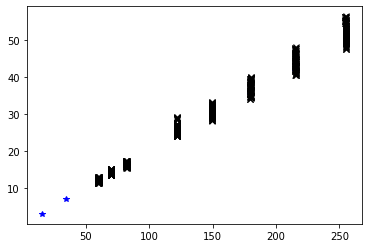

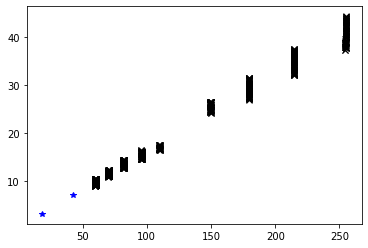

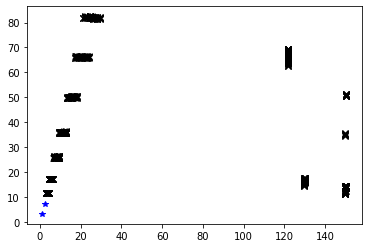

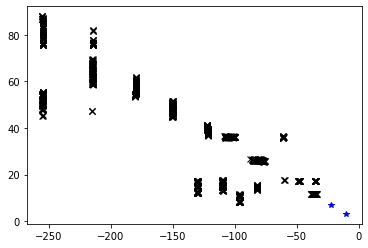

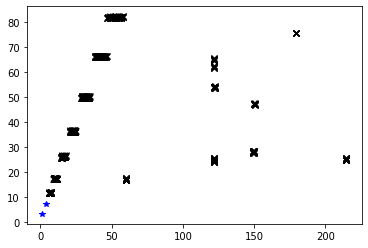

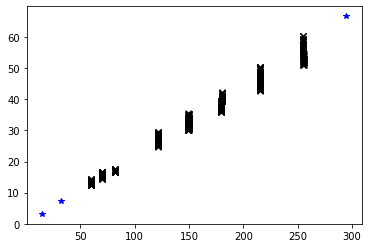

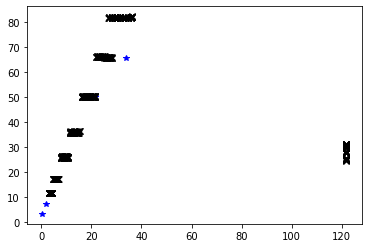

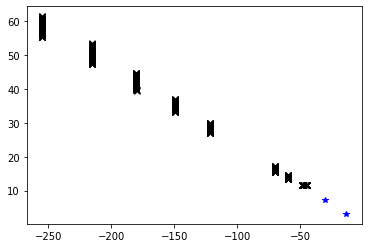

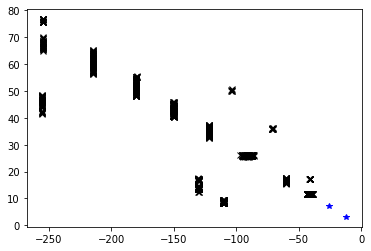

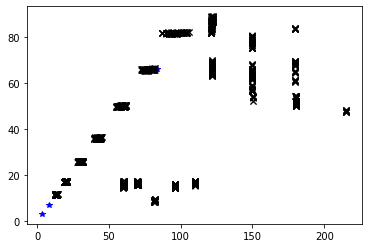

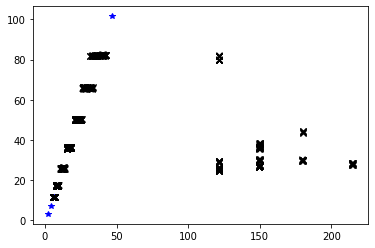

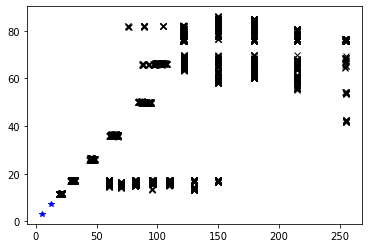

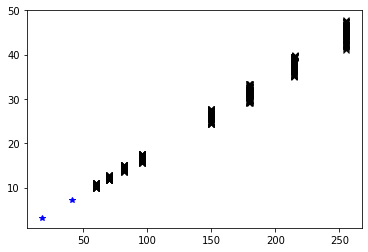

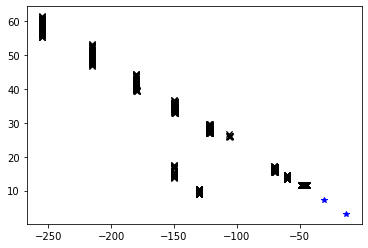

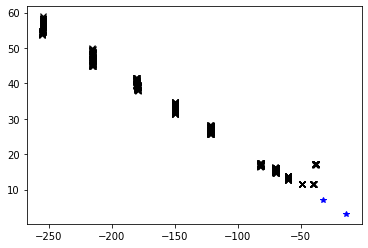

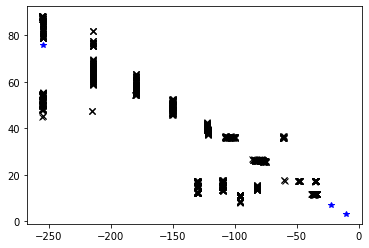

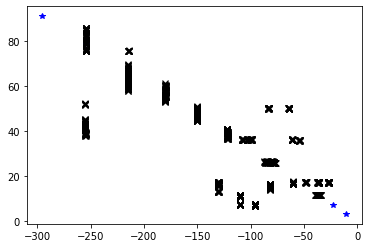

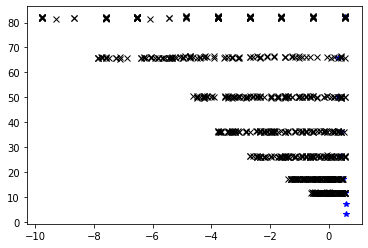

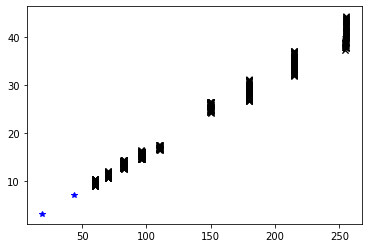

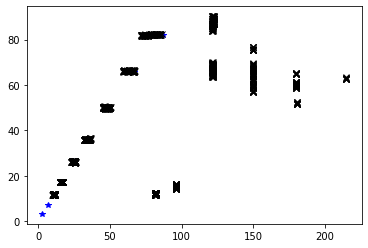

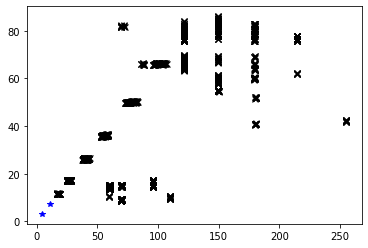

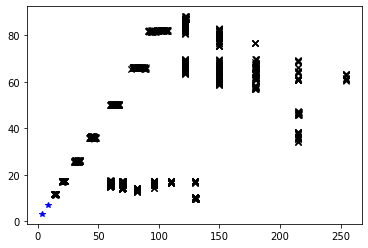

here 81-7 81-7 5.404505095431782e+16        hit_id          x          y           z          r  layer_id  \
189     12519   2.836870  -1.355210   -6.933140   3.143951         2   
1883    13464   2.880880  -1.377940   -7.038720   3.193460         2   
10673   18076   6.425680  -3.258850  -15.596899   7.204823         4   
15021   22679  10.119101  -5.488580  -24.771099  11.511764         6   
21389   26662  14.801401  -8.767250  -36.932102  17.203085         8   
23171   47356  21.352299 -14.324400  -55.129997  25.712042         2   
27486   51788  28.200201 -21.821699  -76.779999  35.657227         4   
33877   45873  38.998402 -39.886497 -121.849998  55.783581        12   
36297   44893  43.343800 -52.014503 -149.550003  67.706673        10   
36738   71077  45.784401 -65.238098 -179.750000  79.700821         8   

       volume_id  module_id       phi   particle_id  ...  nhits  q  \
189            8         87 -0.445660  5.404505e+16  ...     13  1   
1883           8        103 -0

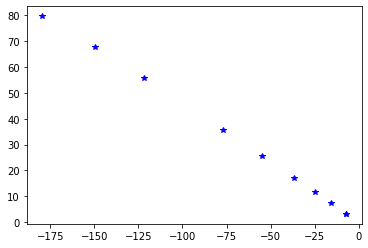

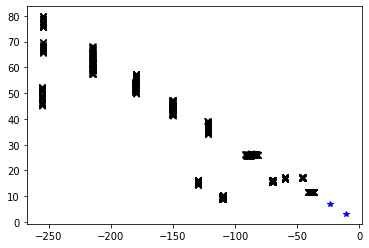

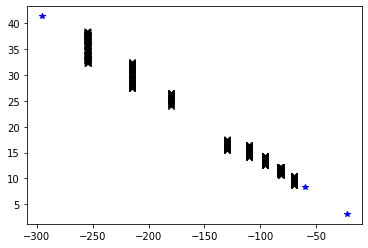

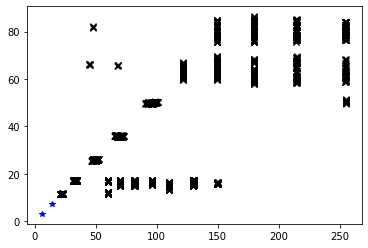

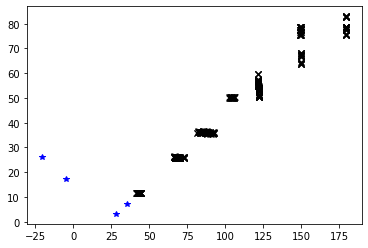

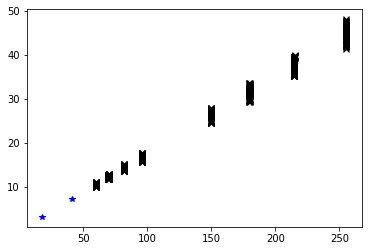

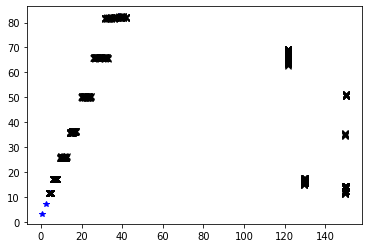

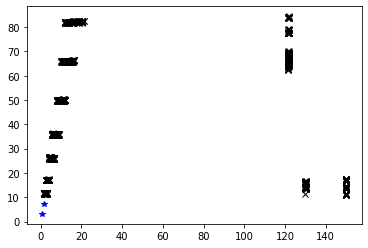

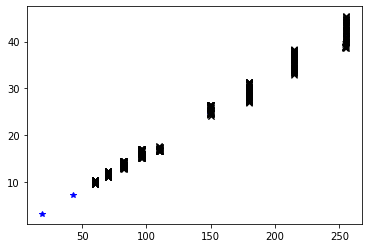

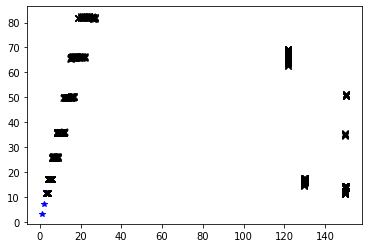

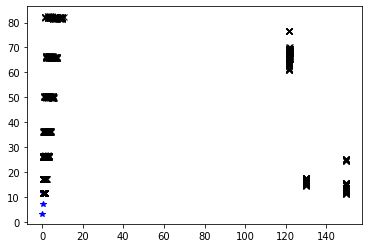

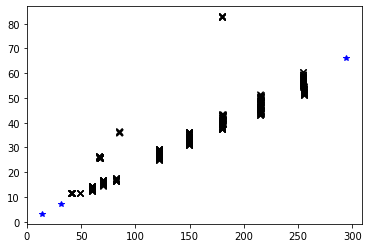

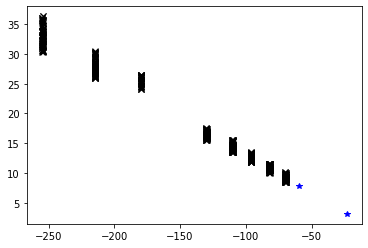

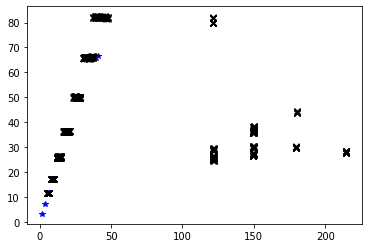

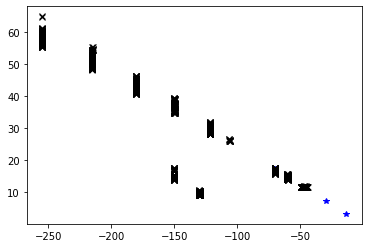

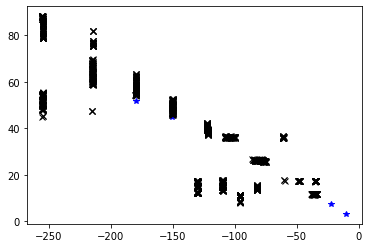

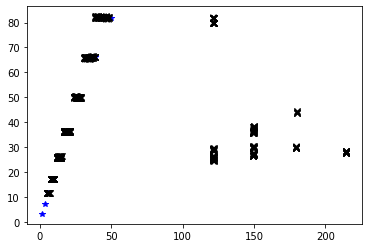

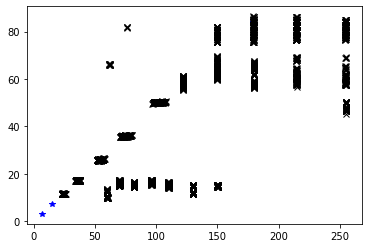

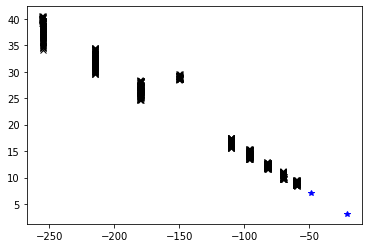

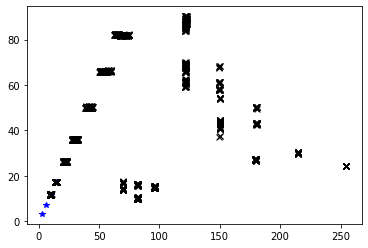

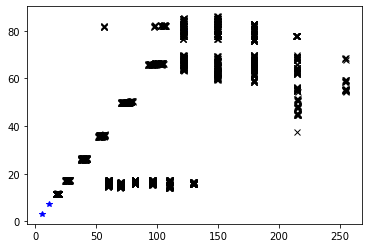

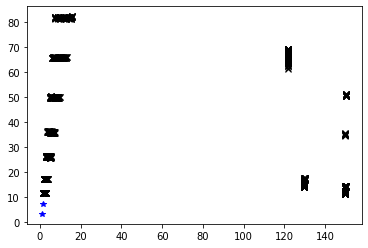

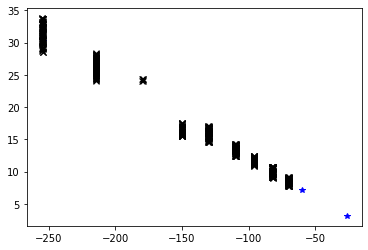

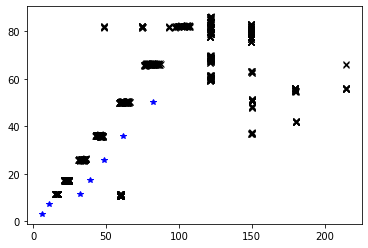

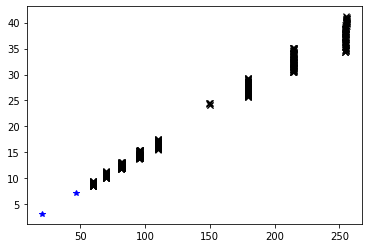

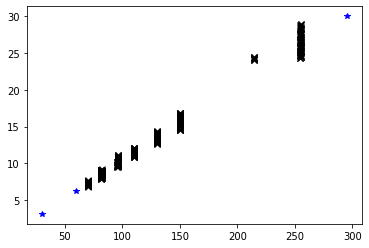

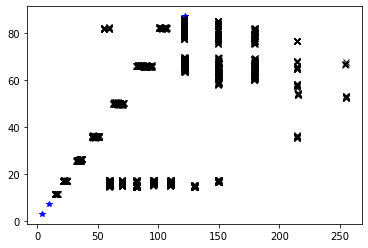

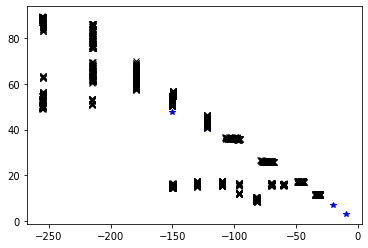

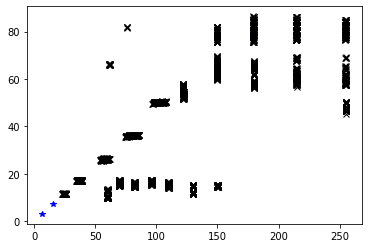

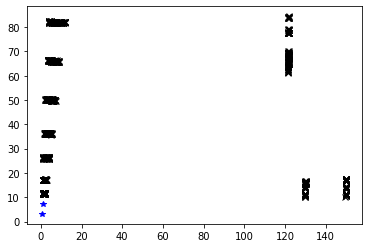

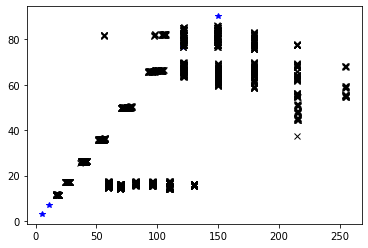

here 8121 8121 7.205792389141627e+17        hit_id        x          y          z          r  layer_id  volume_id  \
227     16496  1.34331   2.842610  20.728199   3.144028         2          8   
1951    16791  1.36447   2.887370  21.053999   3.193538         2          8   
9432    21896  3.14684   6.413960  46.910698   7.144333         4          8   
13267   31861  4.06576   8.137220  59.750000   9.096415         2          9   
14197   33714  4.79479   9.476561  69.800003  10.620508         4          9   
17757   35571  5.68782  11.069600  81.800003  12.445374         6          9   
18847   37225  6.75074  12.916201  95.800003  14.573973         8          9   

       module_id       phi   particle_id  ...  nhits  q  discrete_module_id  \
227          155  1.129339  7.205792e+17  ...     11  1                 910   
1951         171  1.129337  7.205792e+17  ...     11  1                 926   
9432         438  1.114678  7.205792e+17  ...     11  1                1417   
13267 

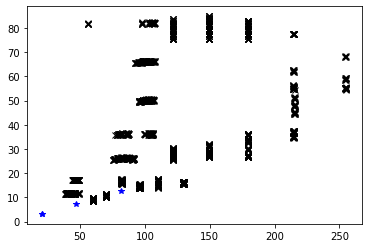

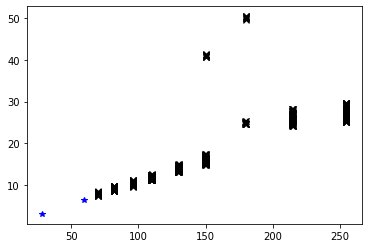

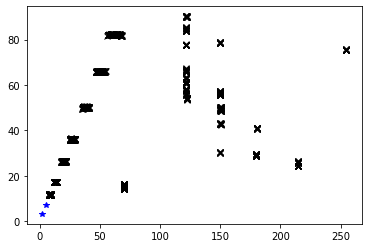

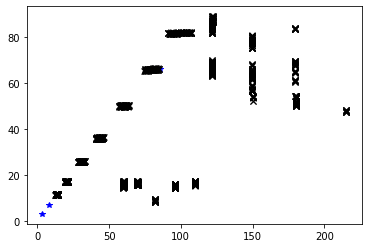

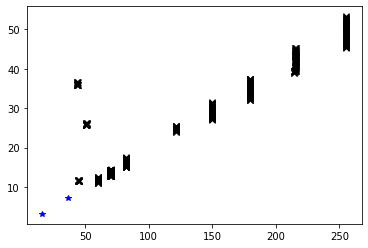

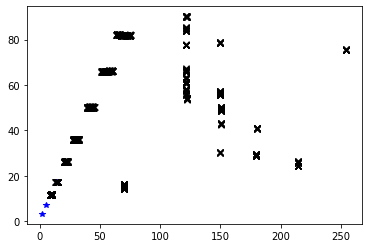

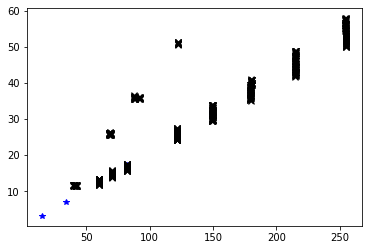

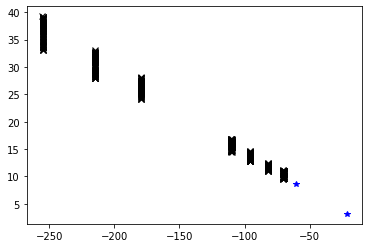

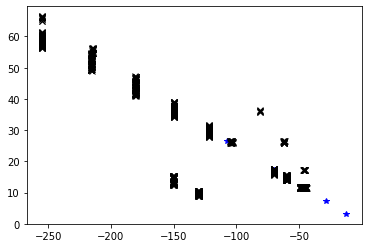

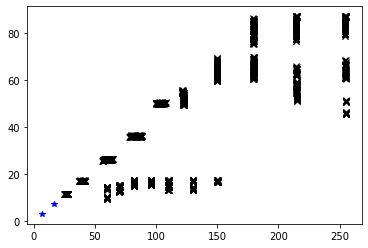

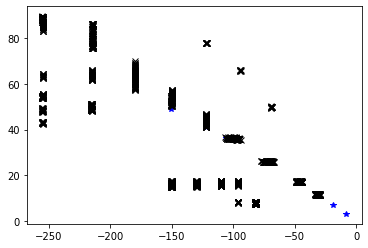

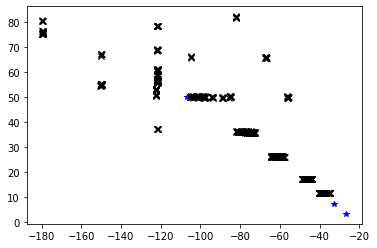

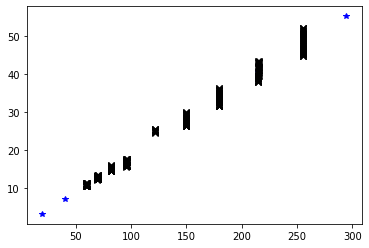

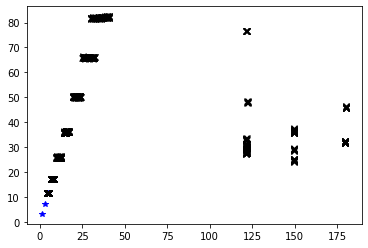

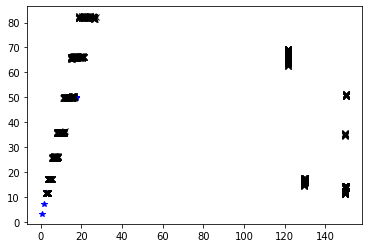

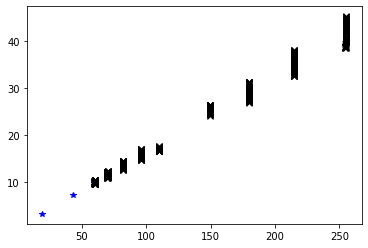

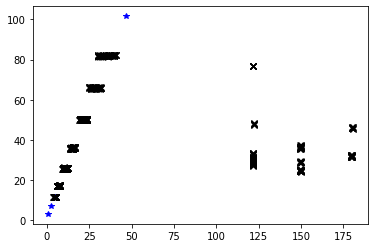

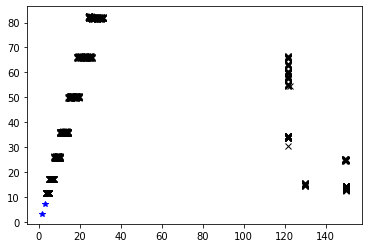

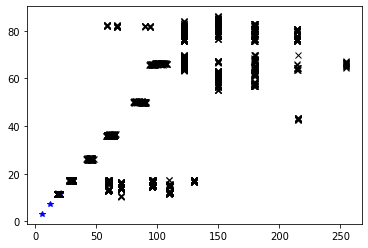

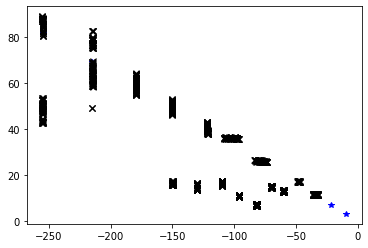

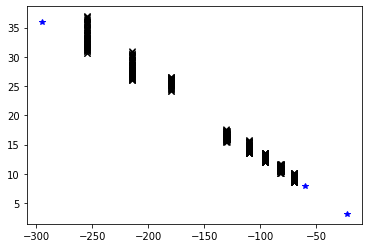

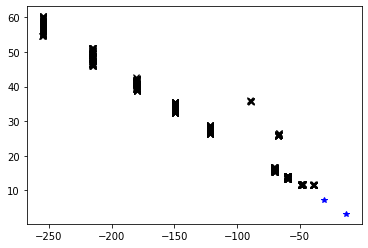

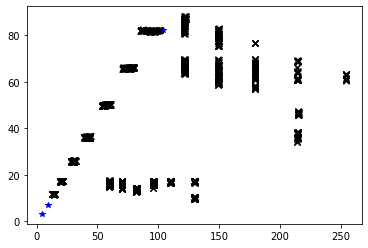

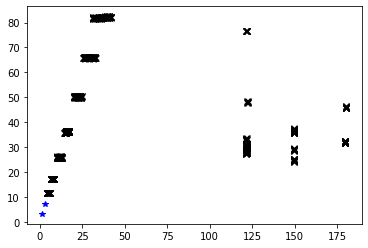

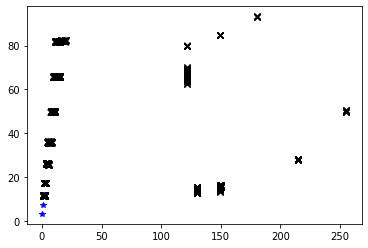

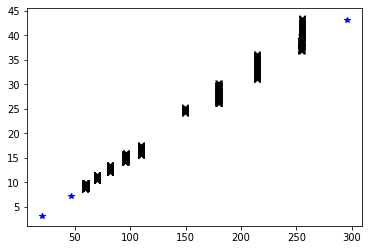

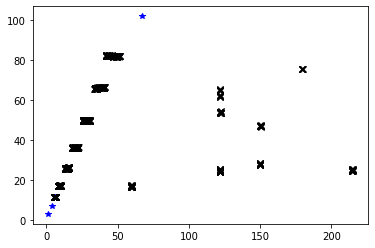

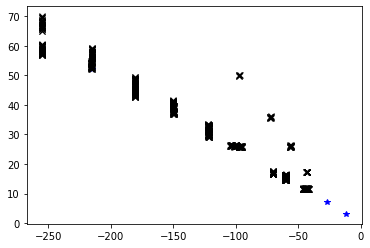

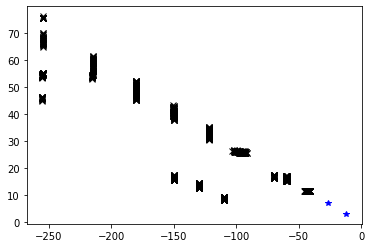

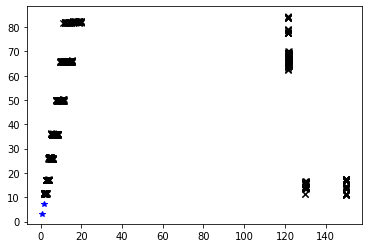

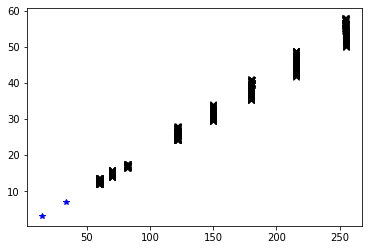

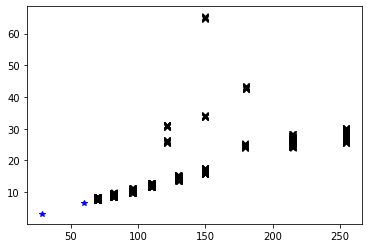

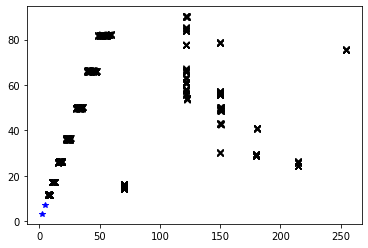

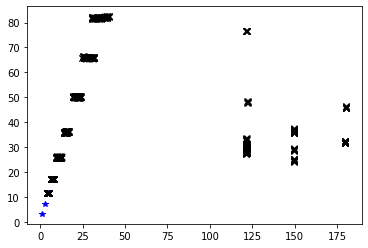

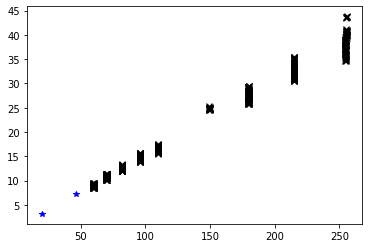

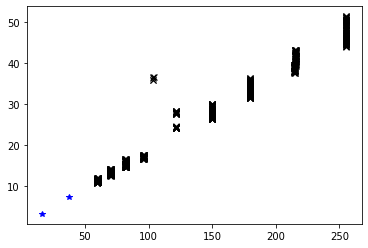

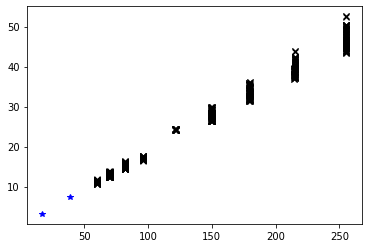

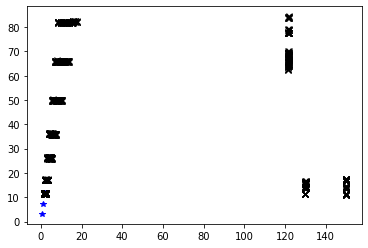

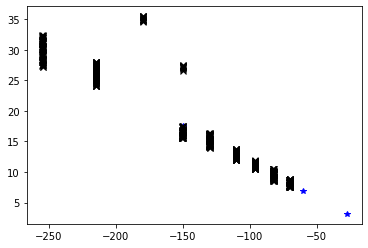

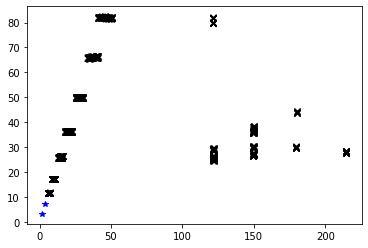

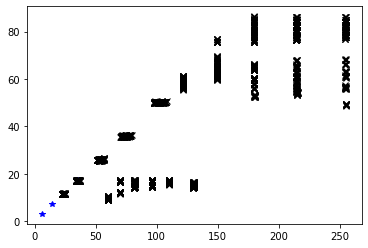

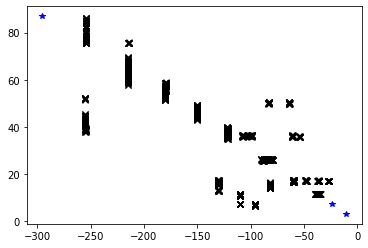

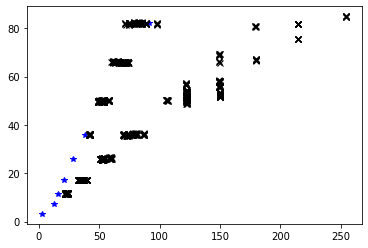

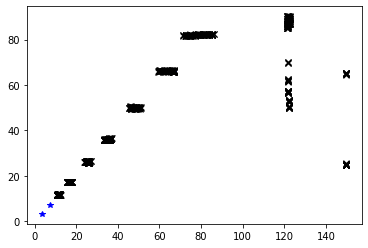

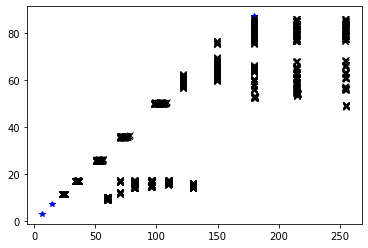

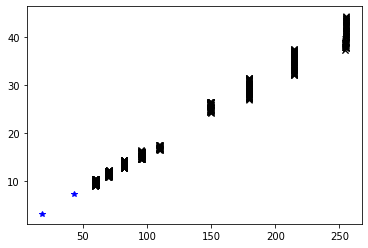

KeyboardInterrupt: 

In [92]:
# seed mapping based 

hitsfound = 0 
tries = 0 

not_in_map = 0 
num_close = 100 
num_in_layer = 100 
len_mod_map = [] 
final_len = []

for pid in allowed_hits.particle_id.unique(): 
    p = allowed_hits[allowed_hits['particle_id']==pid]
    h1 = p.iloc[0]
    h2 = p.iloc[1]
    
    m = (h2.r - h1.r)/(h2.z - h1.z)
    b = h2.r - m*h2.z
    
    try: 
        allowed_modules = mappings[h1.new_module_id][h2.new_module_id]
    except: 
        #print(p)
        #print(h1.new_module_id, h2.new_module_id)
        print("here", h1.new_module_id,h2.new_module_id, pid, p )
    
    not_in_map += len([x for x in p.iloc[2:].new_module_id.values if x not in allowed_modules])
    
    if m > 0: 
        compy = hits[((hits['z'] > h2.z) |  (hits['z'] == h2.z))]
    else: 
        compy = hits[((hits['z'] < h2.z) |  (hits['z'] == h2.z))] 


    comp_hits = compy[compy['new_module_id'].isin(allowed_modules)]
    
    comp_hit_ids = []
    for layer in comp_hits.unique_layer_id.unique(): 
        sub_comps = comp_hits[comp_hits['unique_layer_id']==layer]
        distances = calc_distance(m,b, sub_comps.z, sub_comps.r)
        num_close = num_in_layer
        

        if len(sub_comps) > num_close: 
            idx = np.argpartition(distances, range(num_close))
            sub_best = sub_comps.iloc[idx.values][:num_close]
            #print("sub best", sub_best)
        else: 
            sub_best = sub_comps 
            
        [comp_hit_ids.append(x) for x in sub_best.hit_id.values]
        #print(comp_hit_ids, "and now new \n")
    
### Only selecting number of hits for whole track
#     distances = calc_distance(m,b, comp_hits.z, comp_hits.r)
#     if len(comp_hits) > num_close: 
#         idx = np.argpartition(distances, range(num_close))
#         sub_best = comp_hits.iloc[idx.values][:num_close]
#     else: 
#         sub_best = comp_hits
        
#     comp_hit_ids = sub_best.hit_id
    
    #print(comp_hit_ids)
    final = hits[hits['hit_id'].isin(comp_hit_ids)]
    final_len.append(len(final))
    if len(comp_hits)!=0:
        len_mod_map.append(len(final)/len(comp_hits))

    #print(final)
        
    #print(final)
    hitsfound += len([x for x in p.iloc[2:].new_module_id.values if x in final.new_module_id.values])
    tries += len(p.iloc[2:]) 
    
    plt.plot(p.z, p.r, "b*")
    plt.plot(final.z, final.r, "kx")
    plt.show()
    

    
    

In [91]:
hitsfound/tries

0.926829268292683

In [87]:
not_in_map/tries

0.04884318766066838

In [88]:
np.median(len_mod_map)

0.18909549322407815

In [93]:
final_len

[1986,
 926,
 774,
 797,
 1037,
 1338,
 904,
 739,
 778,
 751,
 1052,
 1600,
 945,
 2074,
 800,
 1011,
 807,
 1338,
 1463,
 700,
 797,
 1280,
 1583,
 1831,
 0,
 1071,
 740,
 2043,
 497,
 800,
 1037,
 1039,
 774,
 1037,
 1030,
 815,
 740,
 945,
 1011,
 1338,
 945,
 2033,
 822,
 1316,
 1874,
 1037,
 782,
 1164,
 784,
 713,
 1902,
 1696,
 2033,
 1039,
 1874,
 1874,
 843,
 1149,
 1600,
 799,
 1149,
 890,
 700,
 1063,
 1880,
 1616,
 683,
 825,
 926,
 1037,
 774,
 926,
 965,
 1747,
 1599,
 740,
 786,
 1831,
 926,
 1063,
 807,
 904,
 860,
 1133,
 1039,
 739,
 903,
 1149,
 926,
 796,
 807,
 782,
 1039,
 818,
 945,
 1860,
 1463,
 896,
 881,
 1860,
 797,
 1280]

In [26]:
mappings['7117']

{'81-27': ['122827',
  '71716',
  '71412',
  '7129',
  '71411',
  '122927',
  '122932',
  '71717',
  '71718',
  '122930',
  '122824',
  '71616',
  '122929',
  '7139',
  '71513',
  '122931',
  '71514',
  '71310',
  '122826',
  '122825',
  '122928',
  '71410',
  '71512',
  '71614',
  '122933',
  '71615',
  '7128'],
 '81-25': ['71514',
  '71412',
  '7129',
  '122931',
  '71310',
  '122826',
  '122825',
  '122929',
  '122827',
  '122932',
  '122930',
  '71513',
  '71616',
  '7128'],
 '81-28': ['71716',
  '71412',
  '71411',
  '122927',
  '71717',
  '71718',
  '122930',
  '122824',
  '71616',
  '122929',
  '7139',
  '71513',
  '122931',
  '71310',
  '122826',
  '122825',
  '122928',
  '71410',
  '71512',
  '71614',
  '71615',
  '7128'],
 '81-26': ['122827',
  '71412',
  '7129',
  '71411',
  '122927',
  '122932',
  '71717',
  '71718',
  '122930',
  '122824',
  '71616',
  '122929',
  '7139',
  '71513',
  '122931',
  '71514',
  '71310',
  '122826',
  '122825',
  '122928',
  '71512',
  '71614',

In [9]:
right_particles = hits[hits['particle_id'].isin(right.index)].reset_index()
left_particles = hits[hits['particle_id'].isin(left.index)].reset_index()

In [11]:
ix_right = np.where(right_particles['diff_z'] < 0)[0]
right_particles = right_particles.drop(ix_right + 1, axis = 0)

ix_left = np.where(left_particles['diff_z'] > 0)[0]
left_particles = left_particles.drop(ix_left + 1, axis = 0 )

In [12]:
f = right_particles.append(left_particles)

In [13]:
hits

,hit_id,x,y,z,r,layer_id,volume_id,module_id,phi,particle_id,pt,nhits,discrete_module_id,z_2,diff_z,Unnamed: 0,unique_layer_id,next_mod_id,connecting_layer_id
0,40897,3.011360,-0.224460,81.750000,3.019714,6,9,52,-0.074400,3.828082e+17,0.677168,12,3515,82.250000,0.500000,30,20.0,3518.0,20.0
1,8965,0.571231,-2.968350,-69.750000,3.022814,12,7,31,-1.380680,3.287681e+17,0.457434,13,570,-70.199997,-0.449997,26,12.0,567.0,12.0
2,10267,-1.268410,2.744500,-69.800003,3.023432,12,7,90,2.003720,2.071694e+17,0.272782,10,629,-70.250000,-0.449997,26,12.0,626.0,12.0
3,35879,0.065512,-3.023100,59.799999,3.023810,2,9,25,-1.549129,4.053422e+17,0.168487,13,3272,60.200001,0.400002,28,18.0,3275.0,18.0
4,38021,-1.251360,-2.754950,70.199997,3.025831,4,9,17,-1.997156,7.926364e+17,0.224269,12,3372,81.750000,11.550003,29,19.0,3483.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71602,87467,-25.121799,-99.048203,-87.840004,102.184395,4,17,184,-1.819190,8.016455e+17,0.437431,15,15131,NaN,NaN,15,10.0,15283.0,10.0
71613,88781,33.172699,-96.655403,-35.760002,102.189507,4,17,1110,-1.240187,4.818874e+17,0.561965,13,16057,NaN,NaN,15,10.0,15905.0,10.0
71625,91097,93.605400,-41.016899,67.240005,102.197639,4,17,2650,-0.412989,4.008292e+17,3.140330,12,17597,NaN,NaN,15,10.0,17445.0,10.0
71627,89811,-33.226002,96.646805,15.160001,102.198685,4,17,1794,1.901926,6.890512e+17,0.354441,14,16741,NaN,NaN,15,10.0,16893.0,10.0


In [156]:
hor_vol = [8, 13, 17]
ver_vol = [7, 9, 12, 14, 16, 18]


In [14]:
len(f)/len(hits)

0.9721133862560049

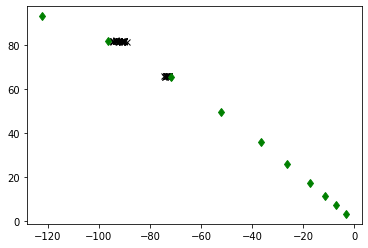

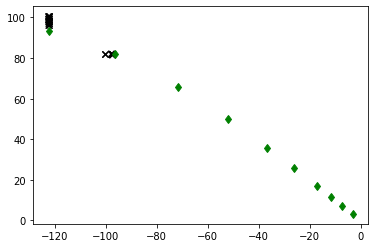

In [76]:

success = 0 
tries = 0 
num_comp = []

hitsfound = 0 
rewards = [] 
rewards_track = [] 


selected_hits_z = []
selected_hits_r = [] 

hit1_z = []
hit1_r = []

hit2_z = []
hit2_r = [] 
pids = [] 

under= []
over= [] 

not_in_comp_mod = 0 

#for pid in tqdm(np.unique(hits.particle_id)[:20]): 
for pid in np.unique(allowed_pids)[:20]:
#for pid in rl_pids[: 
    p = hits[hits['particle_id']==pid]
    smallest_rs = p.groupby(['particle_id', 'unique_layer_id'])['r'].min()
    p = p.merge(smallest_rs)
    p = p.drop_duplicates()
    if len(p) < 4: 
        continue
    #print(p)
    start_hit = p.iloc[0]
    next_start_hit = p.iloc[1]
    
    if start_hit.unique_layer_id == next_start_hit.unique_layer_id: 
        next_start_hit = p.iloc[2]
    track_reward = 0 

    m = (next_start_hit.r - start_hit.r)/(next_start_hit.z - start_hit.z)
    b = next_start_hit.r - m*next_start_hit.z
    #print(p)
    hitids = [] 
    prev_m = m 
    prev_b = b 
    for i in range(len(p)-2):
        #print(hit1)
        hit1 = p.iloc[i]
        hit2 = p.iloc[i+1]
        hit3 = p.iloc[i+2]
#        hit2 = p.iloc[1]
        
        m = (hit2.r - hit1.r)/(hit2.z - hit1.z)
        b = hit2.r - m*hit2.z
#         if hit2.unique_layer_id != hit1.unique_layer_id: 
#             m = (hit2.r - hit1.r)/(hit2.z - hit1.z)
#             b = hit2.r - m*hit2.z
#         else: 
#             #print("keeping prev vlas")
#             pass 
        

        dm = m - prev_m 
        db = b - prev_b
#         m = m - dm 
#         b = b - db
#         prev_m = m 
#         prev_b = b
        #print(dm)
        
        #m = m + dm
        
        #removing inwards ones 
        if (hit1.z < 0) & (m > 0): 
            break 
        elif (hit1.z > 0) & (m < 0): 
            break
        
        try:
            comp_mod = mappings[hit2.new_module_id]
            #comp_mod = mappings[start_hit.new_module_id][next_start_hit.new_module_id]
            #print("hit2 mod id", hit2.discrete_module_id)
        except: 
            #print("haven't seen this module", hit2.discrete_module_id)
            comp_mod = []
            
        
    
        if m > 0: 
            compy = hits[((hits['z'] > hit2.z) |  (hits['z'] == hit2.z))]
        else: 
            compy = hits[((hits['z'] < hit2.z) |  (hits['z'] == hit2.z))] 
        
        #comp_hits = compy[compy['new_module_id'].isin(comp_mod) & 
        #           (compy['r'] > hit2.r)]# & 
                    #(np.abs(hits['z']) > np.abs(hit2.z))]
            
        comp_hits = compy[compy['new_module_id'].isin(comp_mod)]
        #comp_hits = compy
        #print("is in comp hits", hit3.hit_id in comp_hits.hit_id)
        num_comp.append(len(comp_hits))
        
        
        distances = calc_distance(m,b, comp_hits.z, comp_hits.r)
        num_close = 50

        if len(comp_hits) > num_close: 
            idx = np.argpartition(distances, range(num_close))
            final = comp_hits.iloc[idx.values][:num_close]
        else: 
            final = comp_hits 
        
 
        
        hitids.append(final.hit_id.values)
        if hit3.hit_id in final.hit_id.values: 
            hitsfound += 1 
        else: 
            #print("hit1", hit1[['z', 'r']], "hit2", hit2[['z', 'r']], "hit3", hit3[['z', 'r']])
            if hit3.new_module_id not in comp_mod: 
                #print("it wasn't in the comp mods")
                print(p)
                not_in_comp_mod +=1 
            
            hit3_line_r = eval_line_at_point(m, b, hit3.z)
            if hit3.r - hit3_line_r  < 0: 
                under.append(  hit3.r - hit3_line_r)
            else: 
                over.append(  hit3.r - hit3_line_r)

#             print("pid", pid)
#             print("final", final)
#             print("distances", distances)
#             print("idx", idx)
            plt.plot(final.z, final.r, "kx")
#             plt.plot(hit1.z, hit1.r, "bx")
#             plt.plot(hit2.z, hit2.r, "bx")
#             plt.plot(hit3.z, hit3.r, "r*")
#             plt.plot()
            y = np.linspace(hit1.r, np.max(final.r), 1000)
            x = (y -b )/m 
            #plt.plot(x, y)
#             print("particle id is", p.particle_id.iloc[0])
#             print("is in mapping", hit3.discrete_module_id in comp_mod)
#             print("hit 2 z", hit2.z, "hit3 z", hit3.z)
            plt.plot(p.z, p.r, "gd")
#             print("hit 1 layer", hit1.unique_layer_id, "hit 2 lauer", hit2.unique_layer_id)
#             print("dm is ", dm, "db is", db)
#             print("distance line and correct hit", calc_distance(m, b, hit3.z, hit3.r))
#             print("m", m, " b ", b)
#             print("hit3 ", hit3.z, hit3.r)
            #print("distance line and best hit ", calc_distance(m, b, final.iloc[0].z, final.iloc[0].r))
#             for vol in hor_vol: 
#                 v = md[md['volume_id']==vol]
#                 for i in range(v.shape[0]): 
#                     row = v.iloc[i]
#                     plt.plot([row.z_min,row.z_max], [row.r_mean, row.r_mean], "r")

#             for vol in ver_vol: 
#                 v = md[md['volume_id']==vol]
#                 for i in range(v.shape[0]): 
#                     row = v.iloc[i]
#                     plt.plot([row.z_mean,row.z_mean], [row.r_min, row.r_max], "r")
            plt.show()
        tries +=1 
        try: 
            selected_hit = final.iloc[0]
            #print("hit3", hit3[['z', 'r']], "selected_hit", selected_hit[['z', 'r']])
        except:
            #print(final)
            pass
        #reward = -np.sqrt((hit3.z - selected_hit.z)**2 + (hit3.r - selected_hit.r)**2)
        #rewards.append(reward)
        #track_reward += reward
#         selected_hits_z.append(selected_hit.z)
#         selected_hits_r.append(selected_hit.r)
#         pids.append(pid)
#         hit1_z.append(hit1.z)
#         hit1_r.append(hit1.r)
#         hit2_z.append(hit2.z)
#         hit2_r.append(hit2.r)
        #print(final)
    #rewards_track.append(track_reward)

In [77]:
hitsfound/tries

0.986013986013986

In [73]:
not_in_comp_mod/tries

0.0

In [62]:
hits_tmp = hits.drop_duplicates()
hits_tmp[hits_tmp['particle_id']==4503874505277440]

,hit_id,x,y,z,r,layer_id,volume_id,module_id,phi,particle_id,pt,nhits,q,discrete_module_id,Unnamed: 0,unique_layer_id,z_2,diff_z,new_module_id
7815,19468,1.484040,-2.889920,1.020100,3.248694,2,8,118,-1.096389,4503874505277440,0.34659,13,1,873,0,1.0,2.055480,1.035380,811
12937,26733,3.079710,-6.548790,2.055480,7.236800,4,8,235,-1.131213,4503874505277440,0.34659,13,1,1214,1,2.0,3.182620,1.127140,822
17283,33077,4.549970,-10.681800,3.182620,11.610473,6,8,381,-1.168117,4503874505277440,0.34659,13,1,1808,2,3.0,4.591860,1.409240,833
19321,38920,5.943140,-16.039799,4.591860,17.105440,8,8,570,-1.215955,4503874505277440,0.34659,13,1,2725,3,4.0,6.880000,2.288140,845
26368,68267,7.075720,-25.046400,6.880000,26.026678,2,13,452,-1.295467,4503874505277440,0.34659,13,1,5475,7,5.0,9.520000,2.639999,1357
30789,74595,6.573990,-35.333099,9.520000,35.939465,4,13,632,-1.386842,4503874505277440,0.34659,13,1,6495,8,6.0,13.311999,3.792000,13610
33672,80432,2.468770,-49.581100,13.311999,49.642525,6,13,879,-1.521045,4503874505277440,0.34659,13,1,7918,9,7.0,13.480000,0.168001,13713
39383,86209,-8.051081,-65.670502,18.260000,66.162186,8,13,1248,-1.692786,4503874505277440,0.34659,13,1,9925,10,8.0,23.299999,5.039999,13818
41165,101067,-24.627600,-78.160202,23.299999,81.948372,2,17,1465,-1.876040,4503874505277440,0.34659,13,1,13892,14,9.0,23.299999,0.000000,17923
42657,106104,-58.170601,-83.431900,32.520000,101.708900,4,17,2000,-2.179656,4503874505277440,0.34659,13,1,16947,15,10.0,32.520000,0.000000,171033


In [95]:
p

,hit_id,x,y,z,r,layer_id,volume_id,module_id,phi,particle_id,pt,nhits,q,discrete_module_id,Unnamed: 0,unique_layer_id,z_2,diff_z,new_module_id
0,19468,1.484040,-2.889920,1.020100,3.248694,2,8,118,-1.096389,4503874505277440,0.34659,13,1,873,0,1.0,2.055480,1.035380,811
1,26733,3.079710,-6.548790,2.055480,7.236800,4,8,235,-1.131213,4503874505277440,0.34659,13,1,1214,1,2.0,3.182620,1.127140,822
2,33077,4.549970,-10.681800,3.182620,11.610473,6,8,381,-1.168117,4503874505277440,0.34659,13,1,1808,2,3.0,4.591860,1.409240,833
3,38920,5.943140,-16.039799,4.591860,17.105440,8,8,570,-1.215955,4503874505277440,0.34659,13,1,2725,3,4.0,6.880000,2.288140,845
4,68267,7.075720,-25.046400,6.880000,26.026678,2,13,452,-1.295467,4503874505277440,0.34659,13,1,5475,7,5.0,9.520000,2.639999,1357
5,74595,6.573990,-35.333099,9.520000,35.939465,4,13,632,-1.386842,4503874505277440,0.34659,13,1,6495,8,6.0,13.311999,3.792000,13610
6,80432,2.468770,-49.581100,13.311999,49.642525,6,13,879,-1.521045,4503874505277440,0.34659,13,1,7918,9,7.0,13.480000,0.168001,13713
7,86209,-8.051081,-65.670502,18.260000,66.162186,8,13,1248,-1.692786,4503874505277440,0.34659,13,1,9925,10,8.0,23.299999,5.039999,13818
8,101067,-24.627600,-78.160202,23.299999,81.948372,2,17,1465,-1.876040,4503874505277440,0.34659,13,1,13892,14,9.0,23.299999,0.000000,17923
9,106104,-58.170601,-83.431900,32.520000,101.708900,4,17,2000,-2.179656,4503874505277440,0.34659,13,1,16947,15,10.0,32.520000,0.000000,171033


In [66]:
len(under)/(len(under)+ len(over))

0.8300767620376832

In [44]:
hit3_line_r = eval_line_at_point(m, b, hit3.z)
if hit3.r - hit3_line_r  < 0: 

[20.134414672851562]

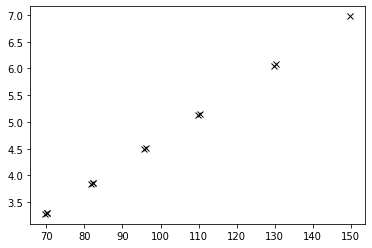

In [163]:
plotting.plot_particle(hits[hits['particle_id']==8.286641868620431e+17])

In [164]:
p = hits[hits['particle_id']== 8.286641868620431e+17]

In [165]:
p

,hit_id,x,y,z,r,layer_id,volume_id,module_id,phi,particle_id,pt,nhits,discrete_module_id,Unnamed: 0,unique_layer_id,next_mod_id,connecting_layer_id
5189,39208,1.12280,3.08304,69.750000,3.281130,4,9,74,1.221540,8.286642e+17,0.246616,14,3429,29,19.0,3426.0,19.0
5493,39132,1.12886,3.10050,70.199997,3.299610,4,9,71,1.221625,8.286642e+17,0.246616,14,3426,29,19.0,3432.0,19.0
5542,39255,1.13299,3.10214,70.250000,3.302565,4,9,77,1.220620,8.286642e+17,0.246616,14,3432,29,19.0,3537.0,20.0
8538,41349,1.29761,3.60960,81.750000,3.835753,6,9,74,1.225694,8.286642e+17,0.246616,14,3537,30,20.0,3540.0,20.0
8622,41374,1.30616,3.63071,82.250000,3.858511,6,9,77,1.225459,8.286642e+17,0.246616,14,3540,30,20.0,3534.0,20.0
8624,41276,1.30736,3.63104,82.199997,3.859228,6,9,71,1.225196,8.286642e+17,0.246616,14,3534,30,20.0,3645.0,21.0
10871,43237,1.49038,4.23178,95.750000,4.486557,8,9,74,1.232174,8.286642e+17,0.246616,14,3645,31,21.0,3648.0,21.0
10943,43308,1.50159,4.25197,96.250000,4.509326,8,9,77,1.231317,8.286642e+17,0.246616,14,3648,31,21.0,3753.0,22.0
12965,44882,1.68118,4.84920,109.750000,5.132359,10,9,74,1.237071,8.286642e+17,0.246616,14,3753,34,22.0,3756.0,22.0
13043,44921,1.68900,4.86931,110.250000,5.153921,10,9,77,1.236916,8.286642e+17,0.246616,14,3756,34,22.0,3861.0,23.0


In [134]:
p['z_2'] = p.groupby('particle_id')['z'].shift(-1)

/home/lhv14/anaconda3/envs/garage/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [135]:
diff = p['z_2'] - p['z']
pos = np.where(diff > 0)[0][0]

In [144]:
np.where(diff > 0)[0]

array([0, 3, 6])

In [138]:
p = p.drop(labels=p.iloc[pos+1].name, axis=0)

In [139]:
p

,hit_id,x,y,z,r,layer_id,volume_id,module_id,phi,particle_id,pt,nhits,discrete_module_id,Unnamed: 0,unique_layer_id,next_mod_id,connecting_layer_id,z_2
7250,6391,-2.59016,-2.33594,-81.800003,3.487914,10,7,14,-2.407756,5.855140e+16,0.354168,12,445,27,13.0,440.0,13.0,-81.750000
7332,6334,-2.60499,-2.35309,-82.250000,3.510414,10,7,12,-2.406957,5.855140e+16,0.354168,12,443,27,13.0,337.0,14.0,-95.800003
9404,4413,-3.04598,-2.72336,-95.800003,4.085913,8,7,14,-2.412056,5.855140e+16,0.354168,12,337,24,14.0,332.0,14.0,-95.750000
9405,4323,-3.04830,-2.72123,-95.750000,4.086224,8,7,9,-2.412823,5.855140e+16,0.354168,12,332,24,14.0,335.0,14.0,-96.250000
9492,4371,-3.06163,-2.73652,-96.250000,4.106351,8,7,12,-2.412207,5.855140e+16,0.354168,12,335,24,14.0,229.0,15.0,-109.800003
11505,2726,-3.51320,-3.10103,-109.800003,4.686039,6,7,14,-2.418430,5.855140e+16,0.354168,12,229,23,15.0,224.0,15.0,-109.750000
11510,2644,-3.51488,-3.10098,-109.750000,4.687266,6,7,9,-2.418675,5.855140e+16,0.354168,12,224,23,15.0,227.0,15.0,-110.250000
11571,2670,-3.52904,-3.11601,-110.250000,4.707828,6,7,12,-2.418271,5.855140e+16,0.354168,12,227,23,15.0,121.0,16.0,-129.800003
14136,1314,-4.17919,-3.63444,-129.800003,5.538482,4,7,14,-2.425800,5.855140e+16,0.354168,12,121,22,16.0,119.0,16.0,-130.250000
14202,1278,-4.19692,-3.64697,-130.250000,5.560083,4,7,12,-2.426192,5.855140e+16,0.354168,12,119,22,16.0,11.0,17.0,NaN


In [130]:
-109.75  - (-109.8)

0.04999999999999716

In [158]:
np.where(p.reset_index()['z_2'] < 0)[0] + 1

array([5])

In [150]:
p.reset_index()

,index,hit_id,x,y,z,r,layer_id,volume_id,module_id,phi,particle_id,pt,nhits,discrete_module_id,Unnamed: 0,unique_layer_id,next_mod_id,connecting_layer_id,z_2
0,44191,57520,-3.767270,-25.670300,22.255299,25.945263,2,13,490,-1.716512,4.504012e+15,0.281702,7,5513,7,5.0,5512.0,5.0,21.740000
1,46480,57510,-4.988100,-25.880701,21.740000,26.357006,2,13,489,-1.761196,4.504012e+15,0.281702,7,5512,7,5.0,6486.0,6.0,12.640000
2,51287,62283,-26.461401,-24.301100,12.640000,35.926998,4,13,623,-2.398726,4.504012e+15,0.281702,7,6486,8,6.0,7822.0,7.0,1.140000
3,58356,66988,-49.189499,-9.001630,1.140000,50.006363,6,13,783,-2.960596,4.504012e+15,0.281702,7,7822,9,7.0,7821.0,7.0,0.660000
4,59994,66979,-49.846199,-8.165000,0.660000,50.510506,6,13,782,-2.979231,4.504012e+15,0.281702,7,7821,9,7.0,9588.0,8.0,-16.782499
5,63231,71595,-57.869801,31.402100,-16.782499,65.840759,8,13,911,2.644423,4.504012e+15,0.281702,7,9588,10,8.0,9587.0,8.0,NaN


# Radius estimates

In [48]:
hits.particle_id[100]

3.8281607008957235e+17

In [68]:
low_p = hits[hits['pt'] < 1]
high_p = hits[hits['pt'] > 2]

In [72]:
high_p['particle_id'].iloc[0]

5.719678041949471e+17

In [88]:
len(hits[hits['pt']> 10]['particle_id'])

70

In [85]:
hits[hits['pt']> 10]['particle_id'].iloc[0]

4521604130275328.0

In [86]:
p = hits[hits['particle_id']==4521604130275328.0]

In [57]:
from circle_fit import least_squares_circle

In [87]:
for i in range(len(p)-1): 
    h1 = p.iloc[i]
    h2 = p.iloc[i+1]
    
    xc, yc, R, residu = least_squares_circle([[h1.x, h1.y], [h2.x, h2.y]])
    print(R)

0.12434854814892096
1.8450060666005623
2.290366925739873
2.714868568100889
4.4210063400787805
4.952997053159806
7.166896291544502
7.778334867616047


In [59]:
R

2838.0335152463335

In [42]:
!pip install plotly

     |████████████████████████████████| 15.2 MB 4.2 MB/s eta 0:00:01


In [53]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

fig = go.Figure(data=go.Scatter3d(
    x=p.y, y=p.z, z=p.x,
    marker=dict(
        size=4,
        color=p.z,
        colorscale='Viridis',
    ),
    line=dict(
        color='darkblue',
        width=2
    )
))

fig.show()

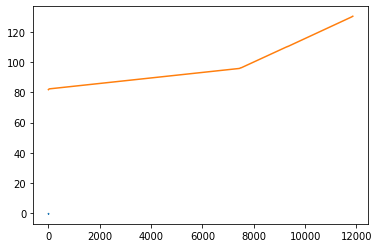

In [36]:


ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');



# Patterns in output

In [172]:
output = pd.read_csv('../evaluation/garage_outputs.csv')

In [173]:
file0 = output.iloc[200:]

In [174]:
par_reward = file0.groupby('particle_id')['reward'].sum()

In [175]:
low_reward = par_reward[par_reward < -10]

In [176]:
np.median(hits[hits['particle_id'].isin(low_reward.index)].pt)

0.47338378

In [177]:
hits['pt'].median()

0.4639576

In [178]:
comb = hits[hits['particle_id'].isin(file0.particle_id)]

In [179]:
file0 = file0.rename(columns={'mc_z': 'z', 'mc_r':'r'})

In [180]:
merged = comb.merge(file0, on=['particle_id', 'z', 'r']).dropna()

In [181]:
merged

,hit_id,x,y,z,r,layer_id,volume_id,module_id,phi,particle_id,...,z_2,diff_z,Unnamed: 0,unique_layer_id,next_mod_id,connecting_layer_id,filenumber,pred_z,pred_r,reward
231,7466,2.364880,2.765070,-81.800003,3.638443,10,7,68,0.863251,6.980656e+17,...,-82.199997,-0.399994,27,13.0,502.0,13.0,0,-81.800003,3.672359,-0.033916
233,6771,2.154000,-2.993470,-81.800003,3.687896,10,7,36,-0.947059,5.269218e+17,...,-82.199997,-0.399994,27,13.0,470.0,13.0,0,-81.750000,3.760045,-0.087782
234,41153,2.396940,2.813220,82.250000,3.695880,6,9,66,0.865126,4.818962e+17,...,95.800003,13.550003,30,20.0,3639.0,21.0,0,82.250000,3.700553,-0.004673
237,7835,-0.764934,3.668090,-81.750000,3.747000,10,7,85,1.776387,4.508135e+15,...,-82.199997,-0.449997,27,13.0,513.0,13.0,0,-81.750000,3.809158,-0.062157
238,7557,0.739935,3.674340,-81.750000,3.748103,10,7,74,1.372075,5.179264e+17,...,-81.800003,-0.050003,27,13.0,510.0,13.0,0,-81.750000,3.725419,-0.022685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851,85034,-67.125702,-47.037899,7.600000,81.965988,2,17,1332,-2.530368,3.467835e+17,...,9.760000,2.160000,14,9.0,16631.0,10.0,0,8.680000,81.837029,-1.087672
1862,84249,-55.100700,61.029305,-27.120001,82.223251,2,17,944,2.305187,4.143490e+17,...,-35.760002,-8.640001,14,9.0,16149.0,10.0,0,-25.460001,82.013321,-1.673222
1865,87089,3.201520,-82.252701,107.860001,82.314987,2,17,2431,-1.531893,3.197735e+17,...,121.449997,13.589996,14,9.0,18163.0,43.0,0,62.340004,81.999283,-45.521091
1873,81395,74.055405,-39.389999,-214.750000,83.879524,6,16,42,-0.488840,2.927483e+17,...,-255.550003,-40.800003,51,40.0,11982.0,41.0,0,-179.550003,66.340492,-39.327566


In [182]:
merged.sort_values('reward')['pt']

1807    0.247806
1484    2.234375
1789    0.262993
1798    1.723281
1809    0.458678
          ...   
1385    0.645765
763     1.454185
303     0.350193
795     0.312495
793     0.454151
Name: pt, Length: 1183, dtype: float32

In [183]:
merged['residual_z'] = merged['z'] - merged['pred_z']
merged['residual_r'] = merged['r'] - merged['pred_r']

(array([3.000e+00, 7.000e+00, 5.000e+00, 2.700e+01, 1.031e+03, 6.700e+01,
        2.100e+01, 1.500e+01, 6.000e+00, 1.000e+00]),
 array([-23.73621368, -18.7730464 , -13.80987911,  -8.84671183,
         -3.88354454,   1.07962275,   6.04279003,  11.00595732,
         15.9691246 ,  20.93229189,  25.89545918]),
 <BarContainer object of 10 artists>)

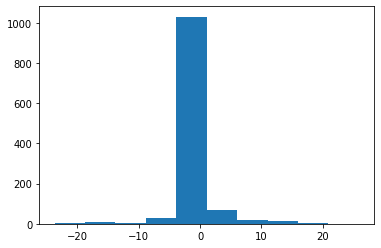

In [184]:
plt.hist(merged['residual_r'])

(array([1.000e+00, 0.000e+00, 2.000e+00, 1.800e+01, 2.300e+01, 1.019e+03,
        8.600e+01, 1.700e+01, 1.200e+01, 5.000e+00]),
 array([-113.37000275,  -93.46800308,  -73.56600342,  -53.66400375,
         -33.76200409,  -13.86000443,    6.04199524,   25.9439949 ,
          45.84599457,   65.74799423,   85.6499939 ]),
 <BarContainer object of 10 artists>)

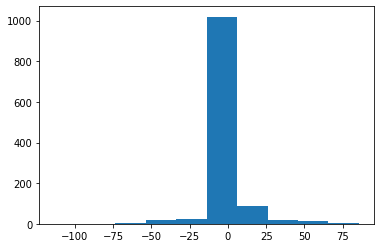

In [185]:
plt.hist(merged['residual_z'])

In [186]:
perfect = merged[merged['reward']==10]

In [191]:
awful = merged[merged['reward']< -20]

In [192]:
awful

,hit_id,x,y,z,r,layer_id,volume_id,module_id,phi,particle_id,...,Unnamed: 0,unique_layer_id,next_mod_id,connecting_layer_id,filenumber,pred_z,pred_r,reward,residual_z,residual_r
1121,46053,17.394001,1.512430,130.199997,17.459629,12,9,56,0.086733,3.197703e+17,...,33,23.0,11415.0,34.0,0,179.550003,24.306835,-49.822759,-49.350006,-6.847206
1126,52440,24.229801,-0.151419,-149.550003,24.230274,10,12,86,-0.006249,1.621312e+17,...,41,26.0,4766.0,26.0,0,-110.199997,17.265354,-39.961645,-39.350006,6.964920
1127,77379,12.871800,20.618900,179.550003,24.306835,6,14,112,1.012721,4.053287e+17,...,44,33.0,11441.0,34.0,0,129.800003,15.957936,-50.445680,49.750000,8.348899
1128,52972,-24.182100,2.730690,-149.550003,24.335789,10,12,168,3.029147,6.530265e+17,...,41,26.0,4848.0,26.0,0,-109.800003,15.649282,-40.688056,-39.750000,8.686506
1129,52947,-24.196899,2.710920,-149.850006,24.348286,10,12,165,3.030022,6.530265e+17,...,41,26.0,4681.0,27.0,0,-129.800003,17.541908,-21.173790,-20.050003,6.806377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,86382,8.265631,81.473404,61.259998,81.891609,2,17,2009,1.469690,1.441157e+17,...,14,9.0,14435.0,9.0,0,40.660000,82.209717,-20.602455,20.599998,-0.318108
1841,85489,-81.496506,8.166281,17.900000,81.904625,2,17,1559,3.041722,7.971387e+17,...,14,9.0,13985.0,9.0,0,46.639999,81.634232,-28.741272,-28.740000,0.270393
1843,86286,21.635300,-79.002602,58.020000,81.911514,2,17,1956,-1.303494,5.719666e+17,...,14,9.0,14382.0,9.0,0,22.219999,81.953995,-35.800030,35.800001,-0.042480
1865,87089,3.201520,-82.252701,107.860001,82.314987,2,17,2431,-1.531893,3.197735e+17,...,14,9.0,18163.0,43.0,0,62.340004,81.999283,-45.521091,45.519997,0.315704


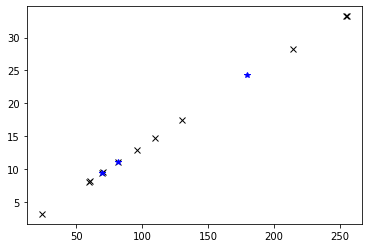

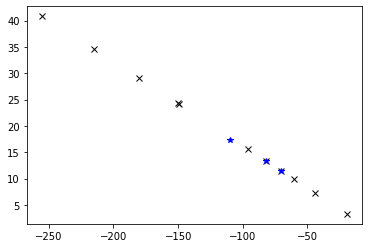

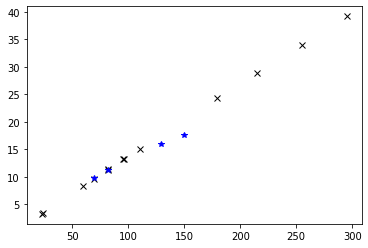

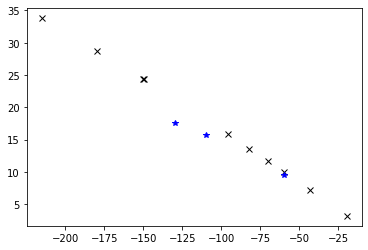

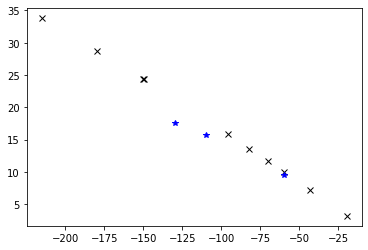

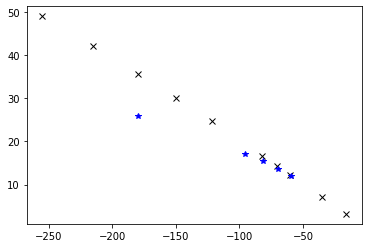

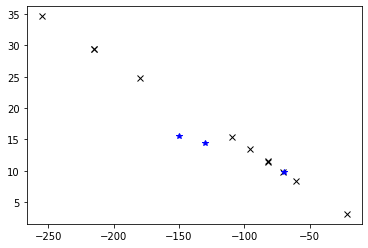

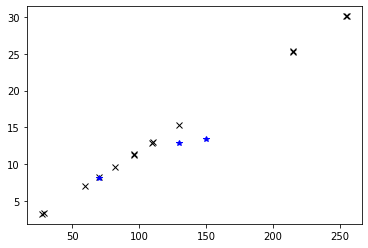

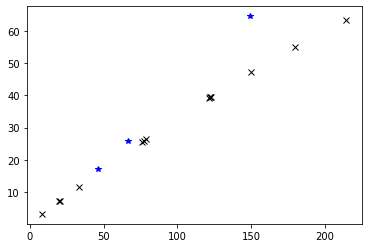

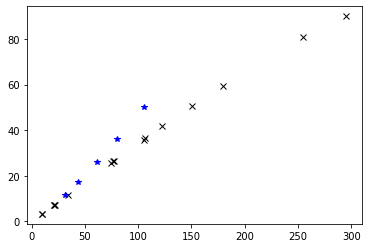

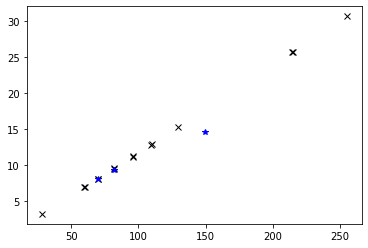

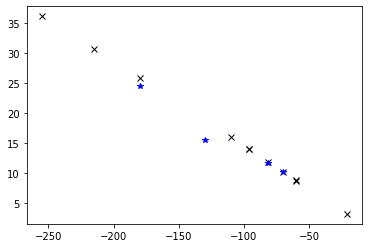

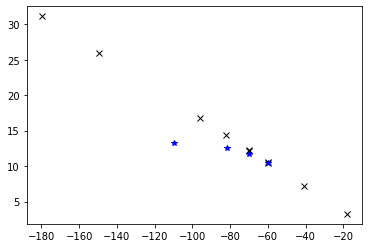

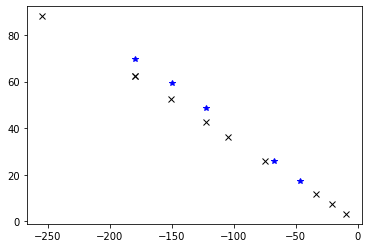

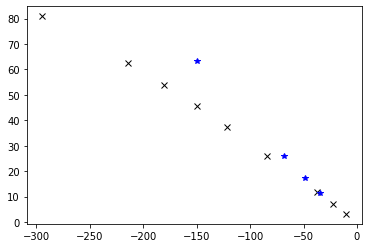

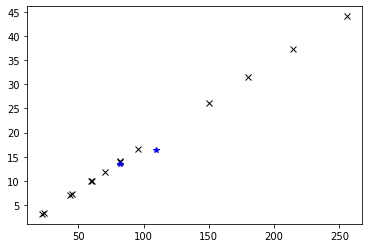

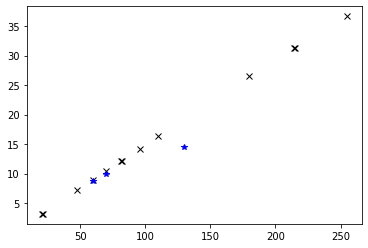

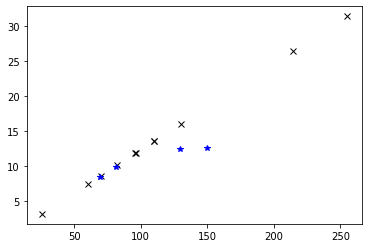

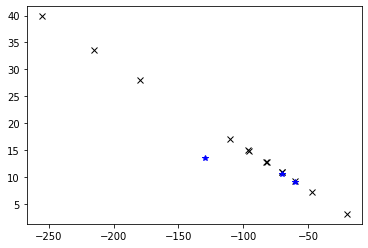

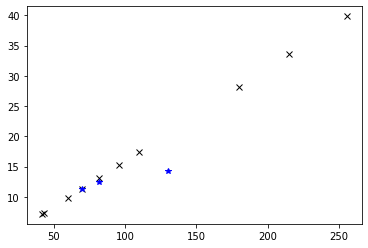

In [193]:
for pid in awful.particle_id[:20]: 
    p = hits[hits['particle_id']==pid]
    p_m = merged[merged['particle_id']==pid]
    plt.plot(p.z, p.r, "kx")
    plt.plot(p_m.pred_z, p_m.pred_r, "b*")
    plt.show() 

In [36]:
p

,hit_id,x,y,z,r,layer_id,volume_id,module_id,phi,particle_id,pt,nhits,q,discrete_module_id,Unnamed: 0,unique_layer_id,z_2,diff_z
0,16303,-2.802350,1.540900,-0.600312,3.198052,2,8,111,2.638857,4507860234928128,1.828609,11,1,866,0,1.0,-0.566563,0.033749
1,22629,-6.325460,3.532680,-0.566563,7.245086,4,8,222,2.632258,4507860234928128,1.828609,11,1,1201,1,2.0,-0.532813,0.033750
2,28006,-10.073700,5.720840,-0.532813,11.584794,6,8,360,2.625112,4507860234928128,1.828609,11,1,1787,2,3.0,-0.476563,0.056250
3,32973,-14.903600,8.646299,-0.476563,17.230083,8,8,540,2.615898,4507860234928128,1.828609,11,1,2695,3,4.0,-0.420000,0.056563
4,56926,-22.451700,13.478999,-0.420000,26.187063,2,13,437,2.600912,4507860234928128,1.828609,11,1,5460,7,5.0,-0.300000,0.120000
5,62221,-30.490000,18.983000,-0.300000,35.916492,4,13,612,2.584723,4507860234928128,1.828609,11,1,6475,8,6.0,-0.300000,0.000000
6,67266,-42.084000,27.624798,-0.060000,50.340763,6,13,851,2.560717,4507860234928128,1.828609,11,1,7890,9,7.0,0.060000,0.120000
7,72135,-54.174904,37.609200,0.060000,65.949768,8,13,1113,2.534758,4507860234928128,1.828609,11,1,9790,10,8.0,0.540000,0.480000
8,84989,-66.386703,48.842499,0.540000,82.418350,2,17,1308,2.507289,4507860234928128,1.828609,11,1,13735,14,9.0,0.540000,0.000000
9,89592,-80.399300,63.390301,0.540000,102.383484,4,17,1656,2.473938,4507860234928128,1.828609,11,1,16603,15,10.0,NaN,NaN


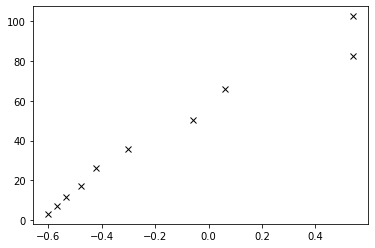

In [37]:
plt.plot(p.z, p.r, "kx")

In [38]:
hit3 = p.iloc[2]

In [43]:
m = mappings[str(int(hit3.discrete_module_id))]

In [49]:
n = [mappings[str(int(x))] for x in m]

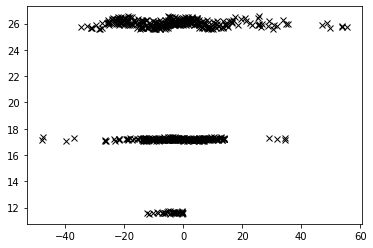

In [53]:
m_hits = hits[hits['discrete_module_id'].isin(m)]
plt.plot(m_hits.z, m_hits.r, "kx")

In [56]:
np.unique(m_hits.unique_layer_id)

array([3., 4., 5.])

In [57]:
hit3

hit_id                2.800600e+04
x                    -1.007370e+01
y                     5.720840e+00
z                    -5.328130e-01
r                     1.158479e+01
layer_id              6.000000e+00
volume_id             8.000000e+00
module_id             3.600000e+02
phi                   2.625112e+00
particle_id           4.507860e+15
pt                    1.828609e+00
nhits                 1.100000e+01
q                     1.000000e+00
discrete_module_id    1.787000e+03
Unnamed: 0            2.000000e+00
unique_layer_id       3.000000e+00
z_2                  -4.765630e-01
diff_z                5.624998e-02
Name: 2, dtype: float64